In [1]:
import pandas as pd
from utils import *

C:\Users\ET USER\AppData\Local\Temp\ipykernel_22100\1421855552.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
raw = numerize_csv('train.csv', expand_classes=True)
# combined=combine_related_columns(raw)

# Data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

Y = raw['Discontinued'].to_numpy()
X = raw.drop('Discontinued', axis=1).to_numpy()

kf = KFold(n_splits=5)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)

In [3]:
def get_cross_validation_accuracies(clf, kf, X, Y):
    fold_accs = np.zeros((kf.get_n_splits(X), 6))
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = Y[train_index]
        y_test = Y[test_index]

        clf.fit(X_train, y_train)
        y_test_preds = clf.predict(X_test)
        y_train_preds = clf.predict(X_train)
        y_test_prob_preds = clf.predict_proba(X_test)
        y_train_prob_preds = clf.predict_proba(X_train)

        fold_accs[j,0] = roc_auc_score(y_test, y_test_preds)
        fold_accs[j,1] = roc_auc_score(y_train, y_train_preds)
        fold_accs[j,2] = roc_auc_score(y_test, y_test_prob_preds[:, 1])
        fold_accs[j,3] = roc_auc_score(y_train, y_train_prob_preds[:, 1])
        fold_accs[j,4] = accuracy_score(y_test, y_test_preds)
        fold_accs[j,5] = accuracy_score(y_train, y_train_preds)

    return np.average(fold_accs, axis=0)

def plot_accuracies(x_vals, accuracies, condensed, title, xlabel, ylabel):
    if not condensed:
        plt.plot(x_vals, accuracies[:,0], label="ROC AUC Testing")
        plt.plot(x_vals, accuracies[:,1], label="ROC AUC Training")
        plt.plot(x_vals, accuracies[:,2], label="ROC AUC Testing with Probabilities")
        plt.plot(x_vals, accuracies[:,3], label="ROC AUC Training with Probabilities")
        plt.plot(x_vals, accuracies[:,4], label="Testing")
        plt.plot(x_vals, accuracies[:,5], label="Training")
    else:
        plt.plot(x_vals, accuracies[:,0], label="Testing")
        plt.plot(x_vals, accuracies[:,1], label="Training")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

Depth: 2
ROC AUC Testing Accuracy: 0.5095090119485244
ROC AUC Training Accuracy: 0.5124150645869285
ROC AUC Testing Accuracy with Probabilities: 0.8378963196049419
ROC AUC Training Accuracy with Probabilities: 0.8409215928186663
Testing Accuracy: 0.7413417979630234
Training Accuracy: 0.7434492360991388
Depth: 3
ROC AUC Testing Accuracy: 0.6330008298398895
ROC AUC Training Accuracy: 0.6348077600939291
ROC AUC Testing Accuracy with Probabilities: 0.8403332267705658
ROC AUC Training Accuracy with Probabilities: 0.8454375574016814
Testing Accuracy: 0.7851369721431
Training Accuracy: 0.7870106916018795
Depth: 4
ROC AUC Testing Accuracy: 0.6591350848533587
ROC AUC Training Accuracy: 0.6663341754398064
ROC AUC Testing Accuracy with Probabilities: 0.8428173267198872
ROC AUC Training Accuracy with Probabilities: 0.8524205816800068
Testing Accuracy: 0.7907505702063253
Training Accuracy: 0.795854252696161
Depth: 5
ROC AUC Testing Accuracy: 0.6799235798951938
ROC AUC Training Accuracy: 0.693291322

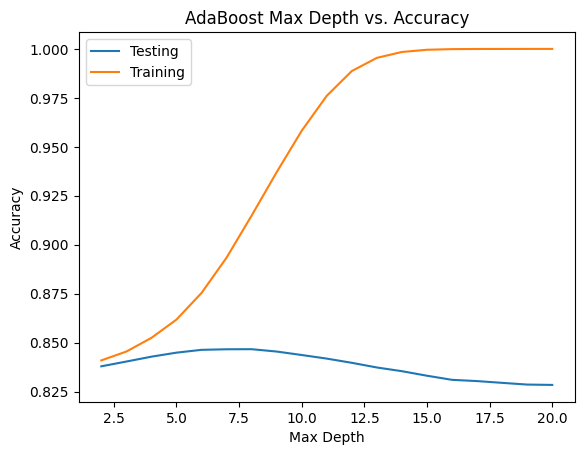

In [4]:
# Test with different max_depths
max_depths = np.arange(2, 12 + 1, 1)
accuracies = np.zeros((len(max_depths), 6))
for (i, depth) in enumerate(max_depths):
    print("Depth: " + str(depth))
    clf = RandomForestClassifier(n_estimators=1000, random_state=0, criterion="entropy")
    clf.set_params(max_depth = depth)

    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

    print(f'ROC AUC Testing Accuracy: {accuracies[i,0]}')
    print(f'ROC AUC Training Accuracy: {accuracies[i,1]}')
    print(f'ROC AUC Testing Accuracy with Probabilities: {accuracies[i,2]}')
    print(f'ROC AUC Training Accuracy with Probabilities: {accuracies[i,3]}')
    print(f'Testing Accuracy: {accuracies[i,4]}')
    print(f'Training Accuracy: {accuracies[i,5]}')

plot_accuracies(max_depths, accuracies[:, [2,3]], True, "Random Forest Max Depth vs. Accuracy", "Max Depth", "Accuracy")

# Max Depth of 7 seems to work best

Number of Estimators: 200
ROC AUC Testing Accuracy: 0.706925154717295
ROC AUC Training Accuracy: 0.7378271541346161
ROC AUC Testing Accuracy with Probabilities: 0.8462104492783851
ROC AUC Training Accuracy with Probabilities: 0.8931802758600584
Testing Accuracy: 0.8017957557730104
Training Accuracy: 0.8253789128882103
Number of Estimators: 300
ROC AUC Testing Accuracy: 0.7079163574987357
ROC AUC Training Accuracy: 0.7355207018447528
ROC AUC Testing Accuracy with Probabilities: 0.8465941839055592
ROC AUC Training Accuracy with Probabilities: 0.8931752762191245
Testing Accuracy: 0.8036666631630947
Training Accuracy: 0.8244432184813929
Number of Estimators: 400
ROC AUC Testing Accuracy: 0.7074066499629754
ROC AUC Training Accuracy: 0.736347101601577
ROC AUC Testing Accuracy with Probabilities: 0.8466609114049348
ROC AUC Training Accuracy with Probabilities: 0.893301659229077
Testing Accuracy: 0.8029179498498719
Training Accuracy: 0.8248175750560304
Number of Estimators: 500
ROC AUC Testin

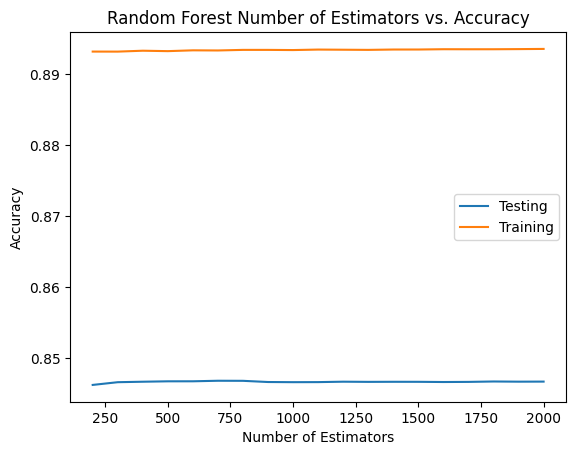

In [5]:
# Test with different n_estimators
num_estimators = np.arange(200, 2000 + 1, 100)
accuracies = np.zeros((len(num_estimators), 6))
for (i, num) in enumerate(num_estimators):
    print("Number of Estimators: " + str(num))
    
    clf = RandomForestClassifier(n_estimators=num, random_state=0, criterion="entropy")
    clf.set_params(max_depth = 7)

    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

    print(f'ROC AUC Testing Accuracy: {accuracies[i,0]}')
    print(f'ROC AUC Training Accuracy: {accuracies[i,1]}')
    print(f'ROC AUC Testing Accuracy with Probabilities: {accuracies[i,2]}')
    print(f'ROC AUC Training Accuracy with Probabilities: {accuracies[i,3]}')
    print(f'Testing Accuracy: {accuracies[i,4]}')
    print(f'Training Accuracy: {accuracies[i,5]}')

plot_accuracies(num_estimators, accuracies[:,[2,3]], True, "Random Forest Number of Estimators vs. Accuracy", "Number of Estimators", "Accuracy")

Number of Estimators: 1
ROC AUC Testing Accuracy: 0.7003256814628583
ROC AUC Training Accuracy: 0.9972480234072079
ROC AUC Testing Accuracy with Probabilities: 0.8277916595591005
ROC AUC Training Accuracy with Probabilities: 0.9999825968659846
Testing Accuracy: 0.7937492773882975
Training Accuracy: 0.9978008302615844
Number of Estimators: 2
ROC AUC Testing Accuracy: 0.7052271755283808
ROC AUC Training Accuracy: 0.9108448750533066
ROC AUC Testing Accuracy with Probabilities: 0.8383252038506542
ROC AUC Training Accuracy with Probabilities: 0.9902444742440597
Testing Accuracy: 0.7982412069104452
Training Accuracy: 0.9444129963029552
Number of Estimators: 3
ROC AUC Testing Accuracy: 0.711321910985577
ROC AUC Training Accuracy: 0.8449968096427967
ROC AUC Testing Accuracy with Probabilities: 0.8418907315452471
ROC AUC Training Accuracy with Probabilities: 0.96987227898764
Testing Accuracy: 0.8025449946220172
Training Accuracy: 0.902208550544979
Number of Estimators: 4
ROC AUC Testing Accurac

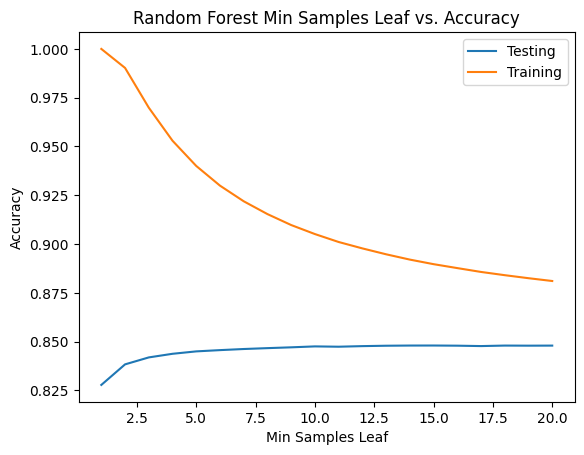

In [6]:
# Test with different min_samples_leaf
min_samples_leaf = np.arange(10, 40 + 1, 1)
accuracies = np.zeros((len(min_samples_leaf), 6))
for (i, num) in enumerate(min_samples_leaf):
    print("Min Samples Leaf: " + str(num))
    
    clf = RandomForestClassifier(n_estimators=1000, random_state=0, criterion="entropy")
    clf.set_params(min_samples_leaf = num)

    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

    print(f'ROC AUC Testing Accuracy: {accuracies[i,0]}')
    print(f'ROC AUC Training Accuracy: {accuracies[i,1]}')
    print(f'ROC AUC Testing Accuracy with Probabilities: {accuracies[i,2]}')
    print(f'ROC AUC Training Accuracy with Probabilities: {accuracies[i,3]}')
    print(f'Testing Accuracy: {accuracies[i,4]}')
    print(f'Training Accuracy: {accuracies[i,5]}')

plot_accuracies(min_samples_leaf, accuracies[:,[2,3]], True, "Random Forest Min Samples Leaf vs. Accuracy", "Min Samples Leaf", "Accuracy")

In [ ]:
# Compare Gini vs. Entropy loss
num_trials = 100
accuracies = np.zeros((100, 6))
print("Gini: ")
for i in range(num_trials):
    clf = RandomForestClassifier(n_estimators=num, random_state=0, criterion="gini")
    clf.set_params(max_depth = depth)
    
    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

print(f'ROC AUC Testing Accuracy: {np.mean(accuracies[:,0])}')
print(f'ROC AUC Training Accuracy: {np.mean(accuracies[:,1])}')
print(f'ROC AUC Testing Accuracy with Probabilities: {np.mean(accuracies[:,2])}')
print(f'ROC AUC Training Accuracy with Probabilities: {np.mean(accuracies[:,3])}')
print(f'Testing Accuracy: {np.mean(accuracies[:,4])}')
print(f'Training Accuracy: {np.mean(accuracies[:,5])}')

num_trials = 100
accuracies = np.zeros((100, 6))
print("Entropy: ")
for i in range(num_trials):
    clf = RandomForestClassifier(n_estimators=num, random_state=0, criterion="entropy")
    clf.set_params(max_depth = depth)
    
    accuracies[i] = get_cross_validation_accuracies(clf, kf, X, Y)

print(f'ROC AUC Testing Accuracy: {np.mean(accuracies[:,0])}')
print(f'ROC AUC Training Accuracy: {np.mean(accuracies[:,1])}')
print(f'ROC AUC Testing Accuracy with Probabilities: {np.mean(accuracies[:,2])}')
print(f'ROC AUC Training Accuracy with Probabilities: {np.mean(accuracies[:,3])}')
print(f'Testing Accuracy: {np.mean(accuracies[:,4])}')
print(f'Training Accuracy: {np.mean(accuracies[:,5])}')

In [7]:
# Generate submission using test.csv

raw_test = numerize_csv_test('test.csv', expand_classes=True)
#X_test = combine_related_columns_test(raw_test)

clf = RandomForestClassifier(n_estimators=1000, random_state=0, criterion="entropy")
clf.set_params(min_samples_leaf = 30)
clf.fit(X, Y)
y_test_prob_preds = clf.predict_proba(raw_test)
write_submission(y_test_prob_preds[:, 1])

C:\Users\ET USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
